## اسکیت کردن با CartPole

> **مسئله**: اگر پیتر بخواهد از دست گرگ فرار کند، باید بتواند سریع‌تر از او حرکت کند. در اینجا خواهیم دید که چگونه پیتر می‌تواند اسکیت کردن را یاد بگیرد، به‌ویژه حفظ تعادل، با استفاده از Q-Learning.

ابتدا، بیایید gym را نصب کنیم و کتابخانه‌های مورد نیاز را وارد کنیم:


In [1]:
#code block 1

## ایجاد محیط cartpole


In [ ]:
#code block 2

برای دیدن نحوه کار محیط، بیایید یک شبیه‌سازی کوتاه را برای ۱۰۰ مرحله اجرا کنیم.


In [ ]:
#code block 3

در طول شبیه‌سازی، ما نیاز داریم که مشاهداتی دریافت کنیم تا تصمیم بگیریم چگونه عمل کنیم. در واقع، تابع `step` مشاهدات فعلی، تابع پاداش و علامت `done` را به ما بازمی‌گرداند که نشان می‌دهد آیا ادامه شبیه‌سازی منطقی است یا خیر:


In [ ]:
#code block 4

ما می‌توانیم مقدار حداقل و حداکثر این اعداد را به دست آوریم:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

بیایید روش‌های گسسته‌سازی دیگر را با استفاده از بازه‌ها بررسی کنیم:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


بیایید اکنون یک شبیه‌سازی کوتاه اجرا کنیم و آن مقادیر گسسته محیط را مشاهده کنیم.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## ساختار جدول Q


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


## نمایش پیشرفت آموزش


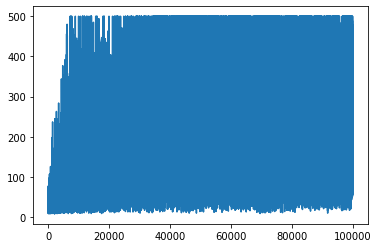

In [20]:
plt.plot(rewards)

از این نمودار نمی‌توان چیزی گفت، زیرا به دلیل ماهیت فرآیند آموزش تصادفی، طول جلسات آموزش بسیار متفاوت است. برای درک بهتر این نمودار، می‌توان میانگین متحرک را بر روی مجموعه‌ای از آزمایش‌ها، مثلاً ۱۰۰، محاسبه کرد. این کار را می‌توان به راحتی با استفاده از `np.convolve` انجام داد:


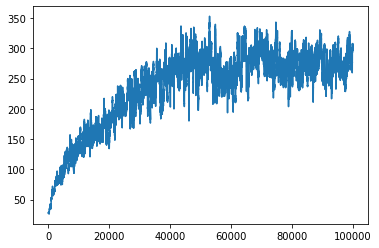

In [22]:
#code block 12

## تغییر مقادیر هایپرپارامترها و مشاهده نتیجه در عمل

حالا جالب خواهد بود که ببینیم مدل آموزش‌دیده چگونه عمل می‌کند. بیایید شبیه‌سازی را اجرا کنیم و همان استراتژی انتخاب عمل را که در طول آموزش استفاده کردیم دنبال کنیم: نمونه‌گیری بر اساس توزیع احتمالی در Q-Table:


In [23]:
# code block 13

## ذخیره نتیجه به صورت GIF متحرک

اگر می‌خواهید دوستانتان را تحت تأثیر قرار دهید، ممکن است بخواهید تصویر GIF متحرک از میله تعادل را برایشان ارسال کنید. برای انجام این کار، می‌توانیم از `env.render` استفاده کنیم تا یک فریم تصویر تولید کنیم و سپس با استفاده از کتابخانه PIL آن‌ها را به GIF متحرک ذخیره کنیم:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوءتفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
